In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(style='whitegrid', color_codes=True)

np.random.seed(sum(map(ord, 'categorical')))
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


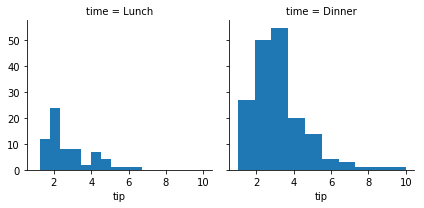

In [3]:
g = sns.FacetGrid(tips, col='time')# 指定数据集和指标
g.map(plt.hist, 'tip')

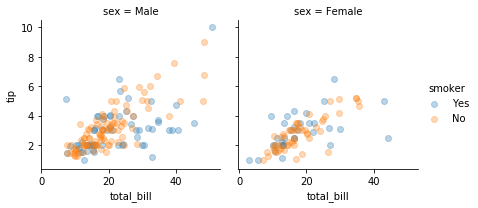

In [4]:
g = sns.FacetGrid(tips, col='sex', hue='smoker')
g.map(plt.scatter, 'total_bill', 'tip', alpha=.3)# alpha透明度
g.add_legend()

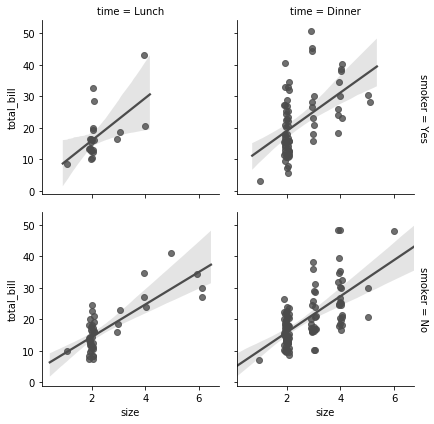

In [5]:
g = sns.FacetGrid(tips, row='smoker', col='time', margin_titles=True)
g.map(sns.regplot, 'size', 'total_bill', color='.3', fit_reg=True, x_jitter=.1)#fit_reg，是否显示回归线

d:\python\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
d:\python\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


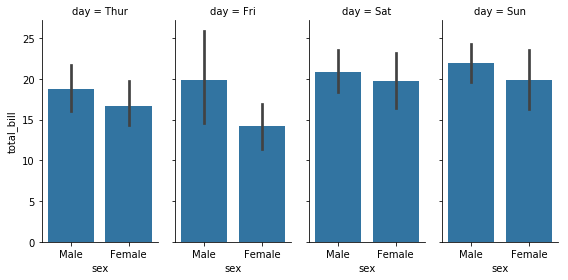

In [6]:
g = sns.FacetGrid(tips, col='day', size=4, aspect=.5)
g.map(sns.barplot, 'sex', 'total_bill')

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')


d:\python\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
d:\python\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


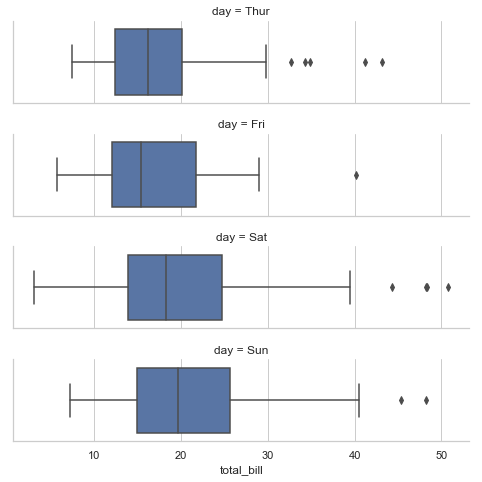

In [32]:
from pandas import Categorical
ordered_days = tips.day.value_counts().index
print(ordered_days)
ordered_days = Categorical(['Thur', 'Fri', 'Sat', 'Sun'])# 自定义顺序
g = sns.FacetGrid(tips, row='day', row_order=ordered_days,
                  size=1.7, aspect=4)
g.map(sns.boxplot, 'total_bill')

d:\python\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


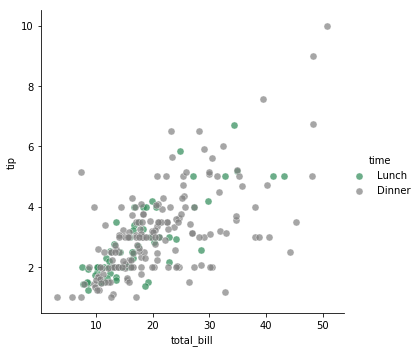

In [7]:
pal = dict(Lunch='seagreen', Dinner='gray')
g = sns.FacetGrid(tips, hue='time', palette=pal, size=5)
g.map(plt.scatter, 'total_bill', 'tip', s=50, alpha=.7, linewidth=.5, edgecolor='white')
g.add_legend()

d:\python\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


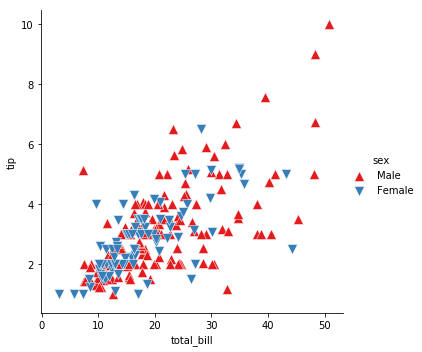

In [8]:
g = sns.FacetGrid(tips, hue='sex', palette='Set1', size=5, hue_kws={'marker':['^', 'v']})
g.map(plt.scatter, 'total_bill', 'tip', s=100, linewidth=.5, edgecolor='white')
g.add_legend()

d:\python\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


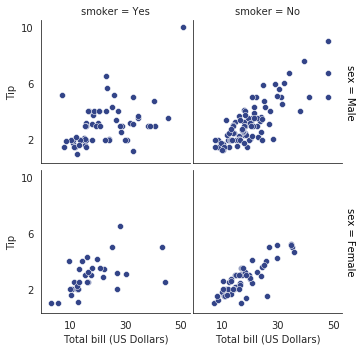

In [9]:
with sns.axes_style('white'):
    g = sns.FacetGrid(tips, row='sex', col='smoker', margin_titles=True,size=2.5)
g.map(plt.scatter, 'total_bill', 'tip', color='#334488', edgecolor='white', lw=.5)
g.set_axis_labels('Total bill (US Dollars)', 'Tip')# x轴，y轴名
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])# 两轴的刻度
g.fig.subplots_adjust(wspace=.02, hspace=.05)

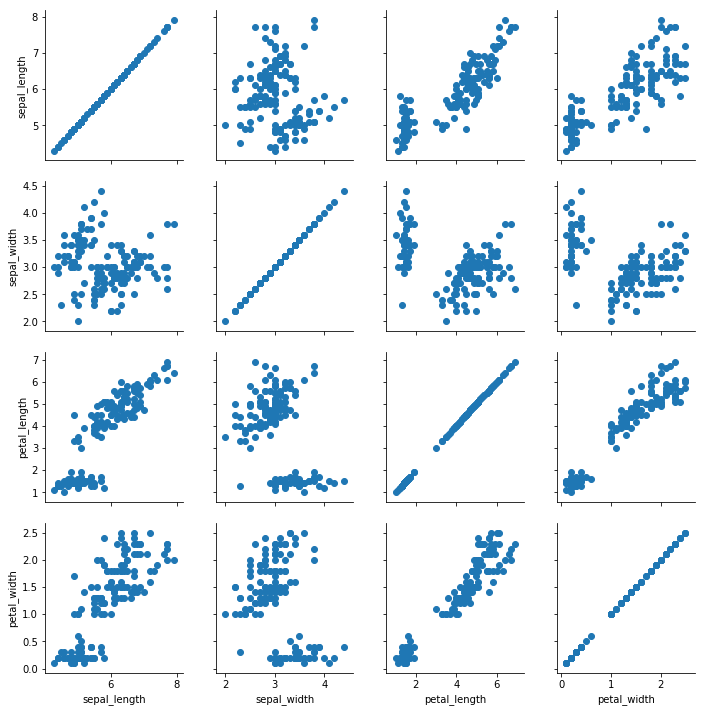

In [10]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

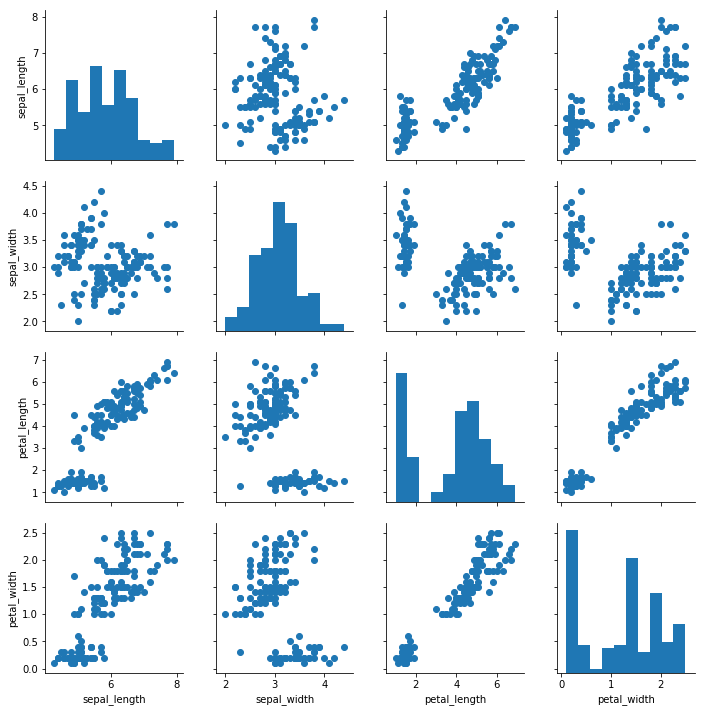

In [11]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)# 对角线上画的图
g.map_offdiag(plt.scatter)# 非对角线上画的图

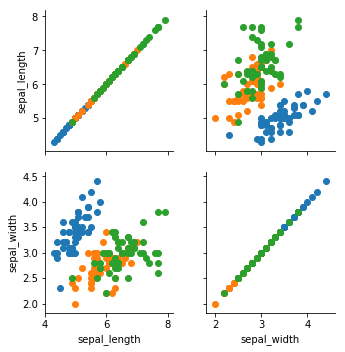

In [14]:
g = sns.PairGrid(iris, vars=['sepal_length', 'sepal_width'], hue='species')
g.map(plt.scatter)

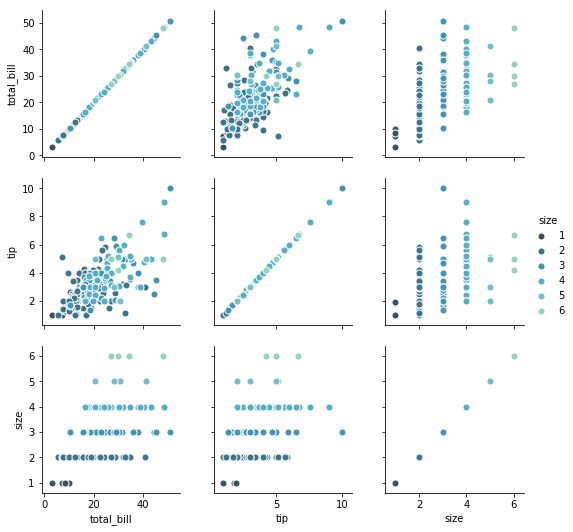

In [15]:
g = sns.PairGrid(tips, hue='size', palette='GnBu_d')
g.map(plt.scatter, s=50, edgecolor='white')
g.add_legend()